# The Scientific Python Stack

#### Quentin CAUDRON  <br /> <br />  Ecology and Evolutionary Biology <br /> <br />  qcaudron@princeton.edu <br /> <br />  @QuentinCAUDRON

In [1]:
# Pretty, big plots that are inline with my cells.
# See the matplotlib section below for more info.
import matplotlib as mpl
import seaborn
%matplotlib inline

mpl.rcParams['figure.figsize'] = (14, 5)
seaborn.set_style("darkgrid")

**Quick note** : this section will go fairly slowly on Numpy, and will speed up for Scipy and Matplotlib. This is to give you an idea of how things are done - just a feel for the language and syntax. Beyond that, your applications may be very different from mine, and by far the best thing to do then is to Google whatever you'd like to do. For Voronoi tessellations, for example, looking up *voronoi tessellation python* will give you the function `scipy.spatial.Voronoi`, along with examples on how to use it.

## Numpy

The core scientific Python stack consists of Numpy, Scipy, and Matplotlib. Numpy brings to Python what Matlab is well known for: strong array manipulation and matrix operations, elementary mathematical functions, random numbers, ...

Let's import `numpy` and create a few arrays.

In [3]:
import numpy as np

A = np.ones(10)           # an array of ones ( floating point type )
B = np.arange(5, 10, 0.2) # like range(), but allows non-integer stride

print(A, "\n")
print(B, "\n")

<class 'numpy.ndarray'>
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.] 

[ 5.   5.2  5.4  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8
  8.   8.2  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8] 



In [6]:
C = np.linspace(0, 2 * np.pi, 10)   # between a and b in c steps
D = np.sin(C)
E = np.random.normal(0, 1, size=5)  # also beta, binomial, gamma,
                                    # poisson, uniform, lognormal, 
                                    # negative binomial, geometric, ...

print(C, "\n")
print(D, "\n")
print(E)

[ 0.          0.6981317   1.3962634   2.0943951   2.7925268   3.4906585
  4.1887902   4.88692191  5.58505361  6.28318531] 

[  0.00000000e+00   6.42787610e-01   9.84807753e-01   8.66025404e-01
   3.42020143e-01  -3.42020143e-01  -8.66025404e-01  -9.84807753e-01
  -6.42787610e-01  -2.44929360e-16] 

[-1.31012481  0.47133441  0.19889671  0.04433124 -0.77384395]


In [7]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    ==================== =========================================================
    Utility functions
    random_sample        Uniformly distributed floats over ``[0, 1)``.
    random               Alias for `random_sample`.
    bytes                Uniformly distributed random bytes.
    random_integers      Uniformly distributed integers in a given range.
    permutation          Randomly permute a sequence / generate a random sequence.
    shuffle              Randomly permute a sequence in place.
    seed                 Seed the random number generator.
    choice               Random sample from 1-D array.
    
    ==================== =========================================================
    
    ==================== =========================================================
    Compatibility functions
    rand                 Uniformly distributed values.
    randn

#### Why do we need this `np.` prefix everywhere ?

Before we go on, a note on *namespaces*. 

A namespace is a mapping from names to objects. Most namespaces are currently implemented as Python dictionaries, but that’s normally not noticeable in any way (except for performance), and it may change in the future. Examples of namespaces are: the set of built-in names (containing functions such as abs(), and built-in exception names); the global names in a module; and the local names in a function invocation. In a sense the set of attributes of an object also form a namespace. The important thing to know about namespaces is that there is absolutely no relation between names in different namespaces; for instance, two different modules may both define a function maximize without confusion — users of the modules must prefix it with the module name.

In [9]:
# Another function for sin can be found in the Python math library
import math

print(math.sin(0.5))
print(np.sin(0.5))

math.sin(0.5) == np.sin(0.5)

0.479425538604203
0.479425538604


True

In [10]:
# BUT
x = np.linspace(0, 2 * np.pi, 20)
print(np.sin(x))
print(math.sin(x))

[  0.00000000e+00   3.24699469e-01   6.14212713e-01   8.37166478e-01
   9.69400266e-01   9.96584493e-01   9.15773327e-01   7.35723911e-01
   4.75947393e-01   1.64594590e-01  -1.64594590e-01  -4.75947393e-01
  -7.35723911e-01  -9.15773327e-01  -9.96584493e-01  -9.69400266e-01
  -8.37166478e-01  -6.14212713e-01  -3.24699469e-01  -2.44929360e-16]


TypeError: only length-1 arrays can be converted to Python scalars

Note how this function doesn't like to be passed lists or arrays. It's thrown us an error, and provided us with a **traceback** - a "chronological" trace of where the error occurred, and what caused it.

This one's not particularly long, as the error is immediate ( and not in a subfunction ), but it does tell us which line it's on. It seems that `math.sin()` doesn't like to be passed anything but length-1 arrays - that is, single floats or ints. Not particularly useful when we're trying to be array-oriented, which is what numpy excels at.

In [12]:
# Numpy arrays can be easily manipulated
blah = np.random.lognormal(0, 1, size=(4, 5))

print(np.dot(blah.T, blah), "\n")
print(blah.shape, "\n")
print(type(blah))
print(blah)

[[ 6.55055072  3.70650789  2.4574371   4.91397108  5.23273728]
 [ 3.70650789  8.30700062  2.83407968  6.01308372  4.96755756]
 [ 2.4574371   2.83407968  3.44685073  3.28714072  5.45861291]
 [ 4.91397108  6.01308372  3.28714072  5.78085989  5.76389332]
 [ 5.23273728  4.96755756  5.45861291  5.76389332  9.15836146]] 

(4, 5) 

<class 'numpy.ndarray'>
[[ 2.00895432  0.97619417  0.4586942   1.60166959  0.97604742]
 [ 0.45423272  0.63724808  1.69395843  1.02170942  2.44646102]
 [ 1.47607283  0.34930618  0.41070333  0.49646827  1.27619371]
 [ 0.35990956  2.61265108  0.44528415  1.38749542  0.76931851]]


The numpy array is its own type, but it's still a container. It expands on the capabilities of the standard Python list. Access is easier though : for multidimensional arrays, you just use a comma to separate dimensions.

In [13]:
print(type(blah[0, 0]), "\n")
print(blah[:, 2::2])

<class 'numpy.float64'> 

[[ 0.4586942   0.97604742]
 [ 1.69395843  2.44646102]
 [ 0.41070333  1.27619371]
 [ 0.44528415  0.76931851]]


The `:` operator is still used. Standard arithmetic is element-wise. Dimensions are broadcast.

In [15]:
print(blah[:, 1] * blah[:, 2] - 2.5, "\n")
print(blah.sum(), blah.mean(), blah.min(), blah.max(), blah.var(), blah.cumsum().std())

[-2.0522254  -1.42052825 -2.35653879 -1.33662789] 

21.8585724065 1.09292862032 0.349306178799 2.61265107593 0.467688202101 6.17089006335


In an interactive environment ( IPython console, Notebook, ... ), you can use tab-completion.

In [16]:
# We can manipulate the shapes of arrays
print(blah.shape, "\n")
print(blah.ravel().shape, "\n") # Unravel / flatten the array
print(blah.reshape(2, 10).shape, "\n")
print(blah.reshape(10, 2).T)

(4, 5) 

(20,) 

(2, 10) 

[[ 2.00895432  0.4586942   0.97604742  0.63724808  1.02170942  1.47607283
   0.41070333  1.27619371  2.61265108  1.38749542]
 [ 0.97619417  1.60166959  0.45423272  1.69395843  2.44646102  0.34930618
   0.49646827  0.35990956  0.44528415  0.76931851]]


**Linear Algebra**

Numpy has a module called `linalg`, which offers things like norms, decompositions, matrix powers, inner and outer products, trace, eigenvalues, etc...

In [17]:
# Linear algebra
A = np.random.normal(size=(3, 3))
Ainv = np.linalg.inv(A)
print(np.dot(A, Ainv))
print(np.allclose(np.dot(A, Ainv), np.eye(3)))

[[  1.00000000e+00  -1.11022302e-15   0.00000000e+00]
 [  1.12757026e-17   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
True


In [18]:
# Modules can be imported under their own namespace for short
import numpy.linalg as lin

print(lin.inv(A), "\n")
print(lin.eigvals(A))

[[ -2.99515583  11.53694835   1.85979721]
 [ -2.31523574   5.0778461    1.38905924]
 [ -0.70481434   3.60802215  -0.79225797]] 

[ 0.13549725+0.28538625j  0.13549725-0.28538625j -0.70184677+0.j        ]


In [19]:
# If we want to do some real linear algebra, we can skip elementwise 
# syntax by declaring an array as a numpy matrix :
B = np.matrix(A)

print(B, "\n")
print(np.dot(B,B), "\n")
print(B * B, "\n") # now MATRIX multiplication
print(A * A) # still ELEMENTWISE multiplication - because it is an array

[[ 0.63286129 -1.1102859  -0.46103572]
 [ 0.19706466 -0.25803802  0.01018634]
 [ 0.3344415  -0.18739031 -0.80567553]] 

[[ 0.02752582 -0.32976736  0.06836379]
 [ 0.07727116 -0.15412332 -0.1016892 ]
 [-0.09472426 -0.17199607  0.49301477]] 

[[ 0.02752582 -0.32976736  0.06836379]
 [ 0.07727116 -0.15412332 -0.1016892 ]
 [-0.09472426 -0.17199607  0.49301477]] 

[[  4.00513410e-01   1.23273477e+00   2.12553931e-01]
 [  3.88344803e-02   6.65836197e-02   1.03761561e-04]
 [  1.11851118e-01   3.51151278e-02   6.49113067e-01]]


In [20]:
# A was our array, B was our matrix of the same array
# Let's confirm these operations are the same
print(type(B), "\n", B, "\n")
print(type(A), "\n", A, "\n")

print(np.allclose(np.dot(A, A), np.dot(B,B)))
print(np.allclose(A*A, B*B))

print(type(B*B), "\n", B*B, "\n")
print(type(A*A), "\n", A*A, "\n")

<class 'numpy.matrixlib.defmatrix.matrix'> 
 [[ 0.63286129 -1.1102859  -0.46103572]
 [ 0.19706466 -0.25803802  0.01018634]
 [ 0.3344415  -0.18739031 -0.80567553]] 

<class 'numpy.ndarray'> 
 [[ 0.63286129 -1.1102859  -0.46103572]
 [ 0.19706466 -0.25803802  0.01018634]
 [ 0.3344415  -0.18739031 -0.80567553]] 

True
False
<class 'numpy.matrixlib.defmatrix.matrix'> 
 [[ 0.02752582 -0.32976736  0.06836379]
 [ 0.07727116 -0.15412332 -0.1016892 ]
 [-0.09472426 -0.17199607  0.49301477]] 

<class 'numpy.ndarray'> 
 [[  4.00513410e-01   1.23273477e+00   2.12553931e-01]
 [  3.88344803e-02   6.65836197e-02   1.03761561e-04]
 [  1.11851118e-01   3.51151278e-02   6.49113067e-01]] 



We can do logical tests on arrays.

In [21]:
a = np.arange(-2, 2, 0.5)
print(a)

# Test elementwise for things greater than or equal to 0
big = a >= 0
print(big)

# We can index using this result
print(a[big])

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]
[False False False False  True  True  True  True]
[ 0.   0.5  1.   1.5]


In [22]:
# We can index using an array of logicals, but what if I want indices ?
big2 = np.where(a >= 0)
print(big)
print(big2, "\n")

# We can index using this also
print(a[big])
print(a[big2])

[False False False False  True  True  True  True]
(array([4, 5, 6, 7]),) 

[ 0.   0.5  1.   1.5]
[ 0.   0.5  1.   1.5]


## Numpy Exercises

#### ( fairly easy )

- Create an array `x` from 0 to 4 pi over 100 points
- Create an array `y` as the cosine of `x`, plus one
- Reshape `y` to be 25x4 in shape
- Find the mean of the four different columns, call this array `means`
- Find only the values of `means` that are greater than 1.01, call this `bigmeans`
- Reshape `means` to give a 2x2 array, and take its logarithm
- Take the dot product of matrix `means` and vector `bigmeans`

**Hints** :
- `np.linspace`
- `np.pi`
- `np.reshape`
- `np.mean` or simply `myarray.mean()`, using the `axis=` argument
- `np.log`
- `np.dot` or `np.matrix`

In [23]:
# Create x and y = cos(x) + 1
x = np.linspace(0, 4 * np.pi, 100)
y = np.cos(x) + 1

# Reshape into four columns, calculate the means
y = y.reshape(25, 4)
means = y.mean(axis=0)
print("Means : {}".format(means))

# Find means that are greater than 1.01
bigmeans = means[means > 1.01]
print("Big means : {}".format(bigmeans))

# Reshape the four means, take logs, take dot product
means = np.log(means.reshape(2, 2))
print("Dot product : {}".format(np.dot(means, bigmeans)))

Means : [ 1.0099189  1.0100811  1.0100811  1.0099189]
Big means : [ 1.0100811  1.0100811]
Dot product : [ 0.02010128  0.02010128]


## Pandas

Pandas is a data analysis library that makes handling datasets less painful. We won't cover it in depth here - just enough to manage our dataset for the next few exercises.

In [51]:
import pandas as pd

# Read a CSV file, show the first few rows
data = pd.read_csv("files/sheep.csv")
data.head()

,Sheep,Image,Lacunarity,Entropy,FociCount,Directionality,TissueToSinusoid
0,1,35,NaN,0.553237,2,0.144159,0.282597
1,1,10,0.171567,0.532842,1,0.186410,0.268192
2,1,22,0.144947,0.533841,2,0.062783,NaN
3,1,38,0.086989,0.547539,1,0.230397,0.266361
4,1,37,0.118694,0.556387,1,0.227331,0.286776


In [55]:
# Show columns of the dataframe
data.columns

Index(['Sheep', 'Image', 'Lacunarity', 'Entropy', 'FociCount',
       'Directionality', 'TissueToSinusoid'],
      dtype='object')

In [ ]:
# We can access columns by their name directly with a . in between
# Here, we can also use data["ShannonDiversity"][:5], dict-style
data.Directionality[:5]

In [ ]:
# Mean of each column
data.mean()

In [ ]:
data.describe()

In [19]:
# How many entries are in the dataset ?
print(data.count(), "\n")

# The dataset contains some N/A values in the Virulence column. 
# Let's get rid of everything that contains an N/A
print("Before N/A dropping : {} entries".format(len(data)))

data = data.dropna(how="any") # how="all" - remove only if all the data is missing
print("After N/A dropping : {} entries".format(len(data)))

Sheep               348
Image               348
Lacunarity          347
Entropy             347
FociCount           348
Directionality      347
TissueToSinusoid    347
dtype: int64 

Before N/A dropping : 348 entries
After N/A dropping : 344 entries


In [20]:
# Let's also get rid of the image ID column, we don't really need it
data.drop("Image", axis=1, inplace=True)
data.head(5)

# Here, we specify that we're dropping a *column* ( along the axis = 1 )

,Sheep,Lacunarity,Entropy,FociCount,Directionality,TissueToSinusoid
1,1,0.171567,0.532842,1,0.186410,0.268192
3,1,0.086989,0.547539,1,0.230397,0.266361
4,1,0.118694,0.556387,1,0.227331,0.286776
5,1,0.195544,0.566461,5,0.076362,0.335803
6,1,0.116570,0.562076,4,0.201428,0.291046


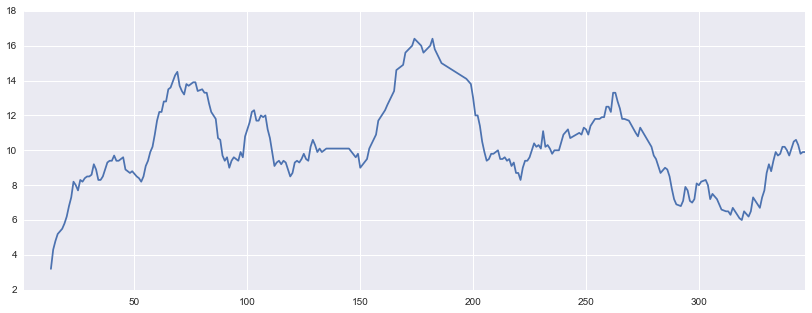

In [21]:
# Let's grab the foci count in sheep with high directionality coefficients
high_directionality = data[data.Directionality < 0.3].FociCount

# and plot it a moving average over ten points
pd.rolling_mean(high_directionality, 10).plot()

Pandas can do SQL-like operations, such as joins or group-bys.

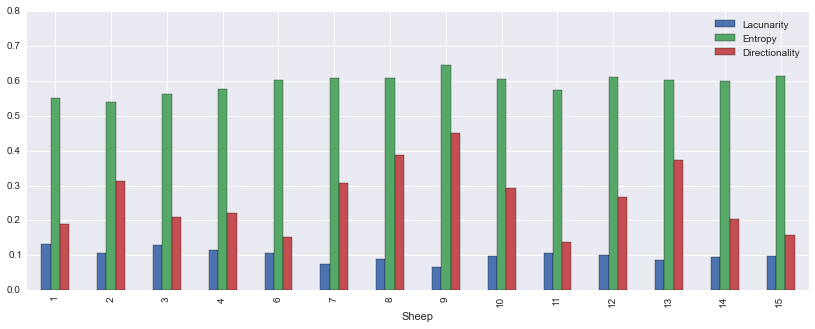

In [22]:
# This plot wasn't very meaningful, let's group by individual sheep first.
# Here, we find the mean value of each column for each individual sheep.
vir = data.groupby("Sheep").mean()

# Let's compare some of their values in a bar plot.
vir[["Lacunarity", "Entropy", "Directionality"]].plot(kind="bar", ylim=(0, 0.8))

## Pandas Exercises

#### ( medium difficulty )

- Load the file `CoffeeTimeSeries.csv`, print a summary so we can see what's going on
    - `pd.read_csv()`
    - `.head()`, maybe `.describe()`
- Create an array `time` containing the Timestamp column as a Datetime object
    - `pd.to_datetime()` turns timestamps into datetimes 
    - use it with argument `dayfirst = True` because these are European dates
- Generate a list of weekdays from `time`, call it `weekdays`
    - `.isoweekday()`; use a list comprehension or a loop
- Generate a histogram of hours of the day ( 12 bins ) when coffees are taken
    - Look up arguments for plotting one column in `data.hist()`

In [23]:
# Read data
data = pd.read_csv("files/CoffeeTimeSeries.csv")
data.head(3)

,Timestamp,Coffees,Name,Time,Hour
0,03/10/2011 08:22,397,Q,1317644520,8
1,04/10/2011 11:48,410,Q,1317743280,11
2,05/10/2011 07:02,439,Ant,1317812520,7


In [24]:
# Time array
time = pd.to_datetime(data.Timestamp, dayfirst=True)

print(time[:3])

0   2011-10-03 08:22:00
1   2011-10-04 11:48:00
2   2011-10-05 07:02:00
Name: Timestamp, dtype: datetime64[ns]


In [25]:
# List of weekdays
weekdays = [day.isoweekday() for day in time]

print(weekdays[:20])

[1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 7, 1]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c2b34a8>]], dtype=object)

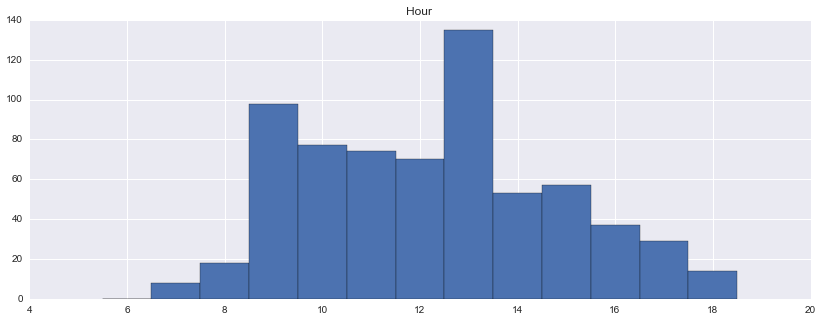

In [26]:
# When, during the day, are coffees had ?
data.hist(column="Hour", bins=np.arange(6, 20), align="left", width=1)

## Matplotlib

Before we continue onto Scipy, let's look into some plotting. Matplotlib is aimed to feel familiar to Matlab users. 

http://matplotlib.org/gallery.html

In [24]:
# This is the main matplotlib import
import matplotlib.pyplot as plt
%matplotlib inline

# In IPython Notebooks, you can use this "magic" command to get figures inline :
# %matplotlib inline
# Spyder users should already have inline plots in IPython kernels

# This magic command ( as defined by the % in front of it ) keeps
# my plots directly below IPython Notebook cells. All magic commands
# are only valid in an IPython environment. 

# The following makes figures bigger and increases label sizes for legibility
mpl.rcParams["figure.figsize"] = (14, 5)
mpl.rcParams["xtick.labelsize"] = 14
mpl.rcParams["ytick.labelsize"] = 14

In [25]:
# This cell contains a few optional things.


# seaborn is a fantastic visualisation library in its own right, but here
# I'm using it as prettifying library for matplotlib, amongst other things.
# Importing it gives me beautiful plots, but it isn't necessary.
import seaborn
# seaborn doesn't come with Anaconda. It is in the Conda repo, however,
# so you can install it from the terminal using either
# conda install seaborn
# or
# pip install seaborn

# Let seaborn thrusters to max awesome
seaborn.set_style("darkgrid")

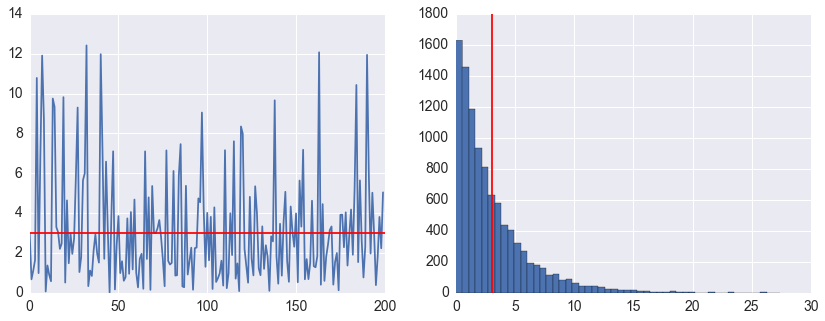

In [26]:
x = np.random.exponential(3, size=10000)

plt.subplot(1, 2, 1)
plt.plot(x[::50])
plt.axhline(x.mean(), color="red")

plt.subplot(1, 2, 2)
plt.hist(x, 50)
plt.axvline(x.mean(), c="r") # c="r" is shorter, both are valid

plt.show()

# In an interactive setting, you will need to call plt.show()
# In IPython, you can call "%matplotlib inline" after importing and you're good to go.
# From here on, I'll drop plot.show().

In [27]:
#help(np.random.exponential)

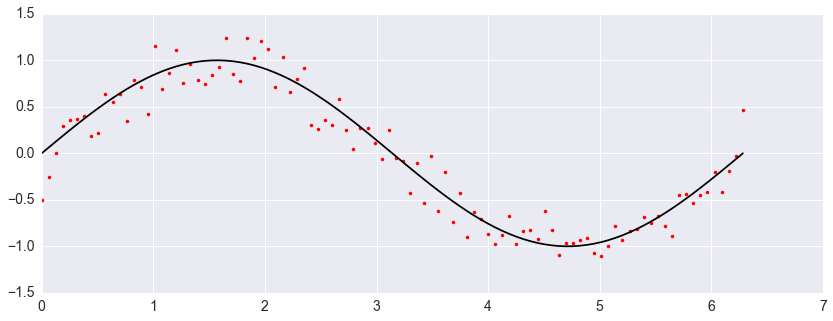

In [28]:
# Like Matlab, we can feed style arguments to the plot function
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(scale = 0.2, size = 100)

# Calling plot() several times without creating a new figure puts them on the same canvas
plt.plot(x, y, "r.")
plt.plot(x, np.sin(x), "k-")

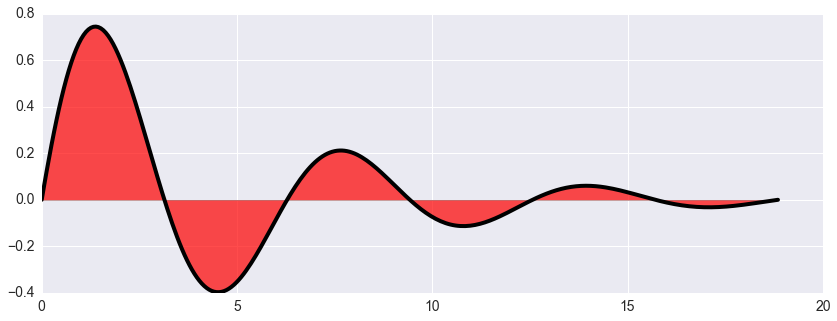

In [29]:
# Area plots ?
x = np.linspace(0, 6 * np.pi, 300)
y = np.exp(-0.2*x) * np.sin(x)

plt.plot(x, y, "k", linewidth=4)
plt.fill_between(x, y, y2=0, facecolor="red", alpha=0.7)

<Container object of 3 artists>

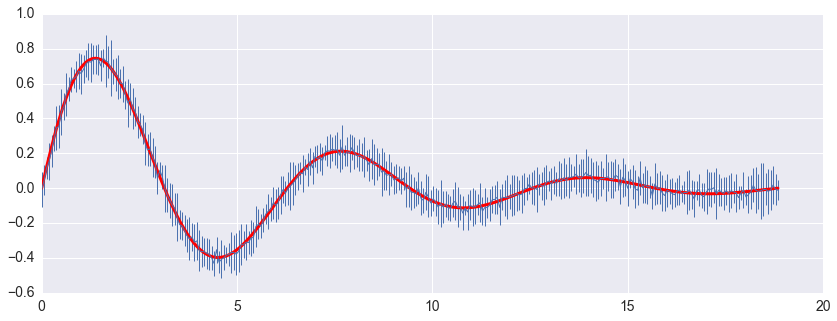

In [30]:
# Error bars ? We have ten measurements of the above process, the decaying sine wave
noise = np.random.normal(size = (len(y), 10)).T

# Let's add some Gaussian noise to our observations, using broadcasting
measuredy = y + 0.05 * noise

# Let's assume we know our error is Gaussian, for simplicity. Compute mean and std :
estmean = measuredy.mean(axis=0)
eststd = measuredy.std(axis=0)

# Plot the estimated mean with two standard deviation error bars, and the real signal
plt.plot(x, y, "r", lw=3)
plt.errorbar(x, estmean, yerr = eststd * 2, lw=1)

In [31]:
# Reset plotting style
seaborn.set_style("white")

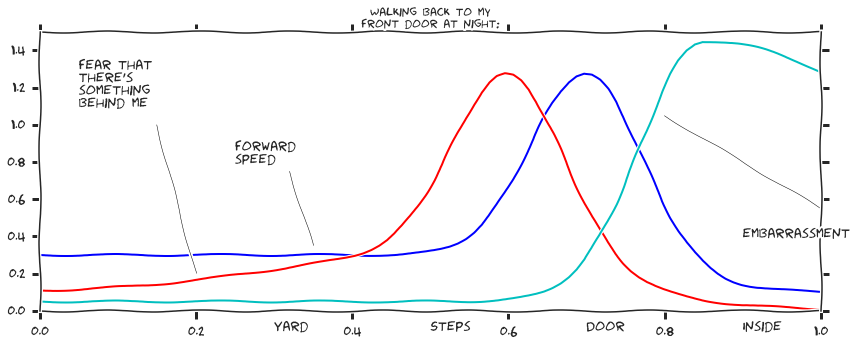

In [37]:
# And, of course ( stolen from Jake VanderPlas )

def norm(x, x0, sigma):
    return np.exp(-0.5 * (x - x0) ** 2 / sigma ** 2)

def sigmoid(x, x0, alpha):
    return 1. / (1. + np.exp(- (x - x0) / alpha))
    
# define the curves
x = np.linspace(0, 1, 100)
y1 = np.sqrt(norm(x, 0.7, 0.05)) + 0.2 * (1.5 - sigmoid(x, 0.8, 0.05))

y2 = 0.2 * norm(x, 0.5, 0.2) + np.sqrt(norm(x, 0.6, 0.05)) + 0.1 * (1 - sigmoid(x, 0.75, 0.05))

y3 = 0.05 + 1.4 * norm(x, 0.85, 0.08)
y3[x > 0.85] = 0.05 + 1.4 * norm(x[x > 0.85], 0.85, 0.3)

with plt.xkcd() :
    
    plt.plot(x, y1, c='gray')
    plt.plot(x, y2, c='blue')
    plt.plot(x, y3, c='red')

    
    plt.text(0.3, -0.1, "Yard")
    plt.text(0.5, -0.1, "Steps")
    plt.text(0.7, -0.1, "Door")
    plt.text(0.9, -0.1, "Inside")
    
    plt.text(0.05, 1.1, "fear that\nthere's\nsomething\nbehind me")
    plt.plot([0.15, 0.2], [1.0, 0.2], '-k', lw=0.5)
    
    plt.text(0.25, 0.8, "forward\nspeed")
    plt.plot([0.32, 0.35], [0.75, 0.35], '-k', lw=0.5)
    
    plt.text(0.9, 0.4, "embarrassment")
    plt.plot([1.0, 0.8], [0.55, 1.05], '-k', lw=0.5)
    
    plt.title("Walking back to my\nfront door at night:")
    
    plt.xlim([0, 1])
    plt.ylim([0, 1.5])

In [38]:
# Reset plot style
seaborn.set_style("darkgrid")

## Matplotlib Exercises

#### ( fairly tough )

- Using your Coffee dataset, plot the number of coffees against time
    - `plt.plot()`
- Plot a histogram of the number of coffees on each day of the week
    - `plt.hist()`, use argument `bins` to get seven bins
- Given that each row is a new coffee, generate an array of days between coffees
    - `np.diff()`
    - default timestamps are in nanoseconds, so divide by 8.64e13 to get in days
    - cast this as a float using `.astype(float)`
- Plot a scatter of the time between coffees
- Generate a pie chart of the contributions of people who collected the data
    - `plt.figure(figsize=(10,10))` for a square axis
    - `plt.pie()`

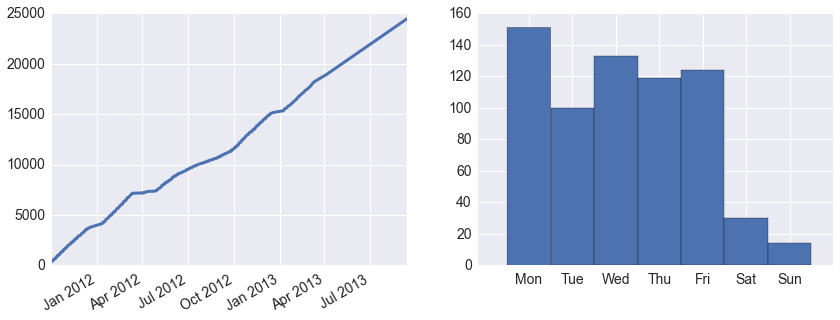

In [39]:
# Coffees against time
plt.subplot(121)
plt.plot(time.values, data.Coffees, lw=3)
plt.gcf().autofmt_xdate()

# Coffees on each day of the week
plt.subplot(122)
plt.hist(weekdays, bins=7, align="left")
plt.xticks(np.linspace(1, 7, 8), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);

/Users/qcaudron/anaconda/envs/py3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


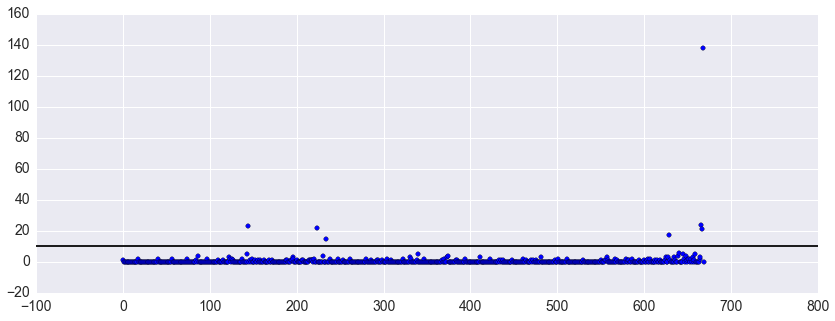

In [40]:
# Number of days between each coffee
timediff = (np.diff(time) / 8.64e13).astype(float)

plt.scatter(range(len(timediff)), timediff)
plt.axhline(10, color="black")

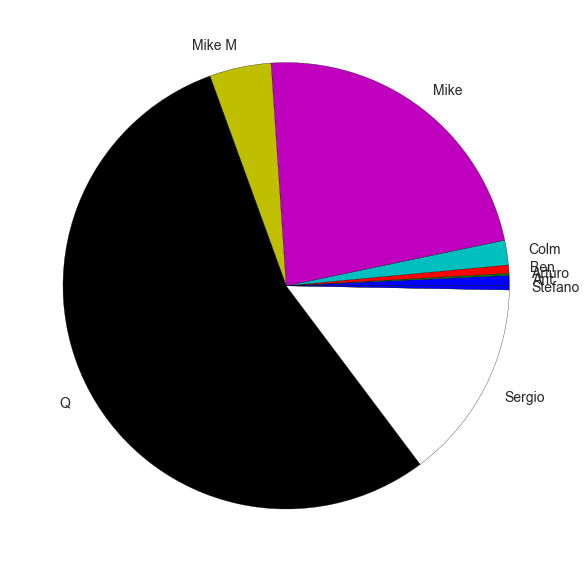

In [41]:
# Names of the contributors
contributors = np.unique(data.Name)

# Number of contributions
contributions = [np.sum(data.Name == person) for person in contributors]

# Plot ( on square axes )
plt.figure(figsize=(10,10))
plt.pie(contributions, labels=contributors);

## Scipy

Scipy does all sorts of awesome stuff : integration, interpolation, optimisation, FFTs, signal processing, more linear algebra, stats, image processing, ... Here are just a few **examples**. Don't study the code, it's easier to just **Google** what you're after than trying to learn every command in scipy.

http://docs.scipy.org/doc/scipy/reference/

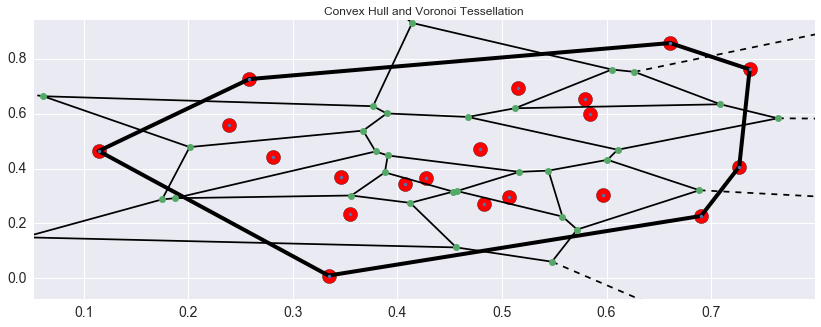

In [74]:
import scipy.spatial as spatial

# Convex hulls
ax = plt.axes()
points = np.random.normal(0.5, 0.2, size=(20,2))
plt.scatter(points[:, 0], points[:, 1], s=200, c="r")
hull = spatial.ConvexHull(points)
for i in hull.simplices :
    plt.plot(points[i, 0], points[i, 1], "k", linewidth=4)
spatial.voronoi_plot_2d(spatial.Voronoi(points), ax)
plt.title("Convex Hull and Voronoi Tessellation")

In [75]:
help(spatial.ConvexHull)

Help on class ConvexHull in module scipy.spatial.qhull:

class ConvexHull(_QhullUser)
 |  ConvexHull(points, incremental=False, qhull_options=None)
 |  
 |  Convex hulls in N dimensions.
 |  
 |  .. versionadded:: 0.12.0
 |  
 |  Parameters
 |  ----------
 |  points : ndarray of floats, shape (npoints, ndim)
 |      Coordinates of points to construct a convex hull from
 |  incremental : bool, optional
 |      Allow adding new points incrementally. This takes up some additional
 |      resources.
 |  qhull_options : str, optional
 |      Additional options to pass to Qhull. See Qhull manual
 |      for details. (Default: "Qx" for ndim > 4 and "" otherwise)
 |      Option "Qt" is always enabled.
 |  
 |  Attributes
 |  ----------
 |  points : ndarray of double, shape (npoints, ndim)
 |      Coordinates of input points.
 |  vertices : ndarray of ints, shape (nvertices,)
 |      Indices of points forming the vertices of the convex hull.
 |      For 2-D convex hulls, the vertices are in cou

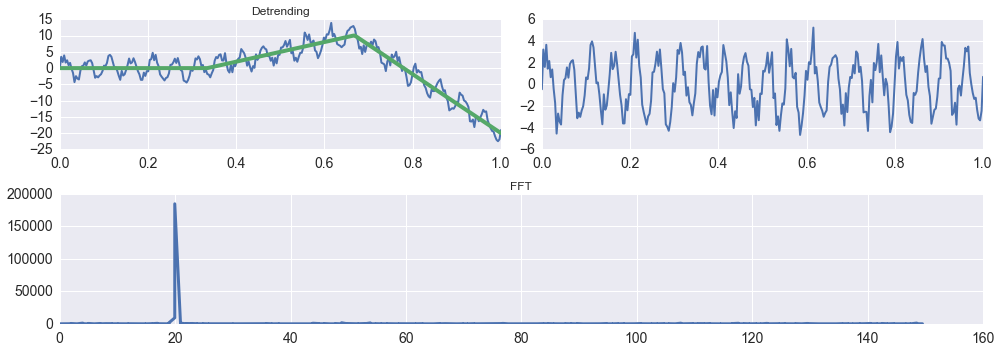

In [44]:
from scipy.signal import detrend
from scipy import fftpack

# Signal Processing - create trending signal, detrend, FFT
x = np.linspace(0, 1, 300)
trend = np.zeros_like(x)
trend[100:200] = np.linspace(0, 10, 100)
trend[200:] = np.linspace(10, -20, 100)
y = np.random.normal(loc = 3 * np.sin(2 * np.pi * 20 * x)) + trend # Signal is a sine wave with noise and trend
yt = detrend(y, bp = [100, 200]) # detrend, giving break points
Yfft = fftpack.rfft(yt) # Calculate FFT
freqs = fftpack.rfftfreq(len(yt), x[1] - x[0]) # Frequencies of the FFT

plt.figure()
plt.subplot2grid((2, 2), (0, 0))
plt.title("Detrending")
plt.plot(x, y, lw=2)
plt.plot(x, trend, lw=4)
plt.subplot2grid((2, 2), (0, 1))
plt.plot(x, yt, lw=2)
plt.subplot2grid((2, 2), (1, 0), colspan=2)
plt.title("FFT")
plt.plot(freqs, (np.abs(Yfft)**2), lw=3)
plt.tight_layout()

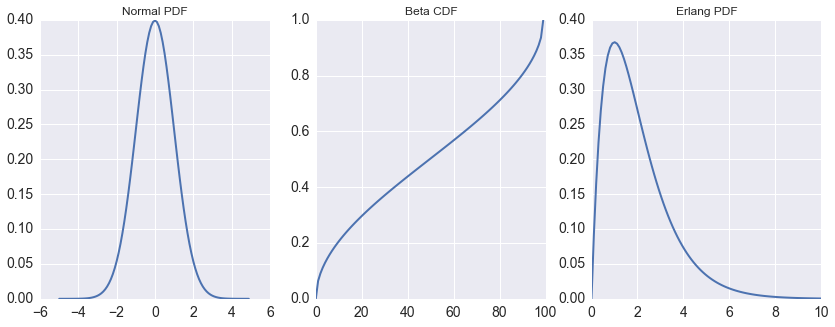

In [45]:
import scipy.stats as st

# Distributions
plt.figure()
plt.subplot(131)
plt.title("Normal PDF")
plt.plot(np.arange(-5, 5, 0.1), st.norm.pdf(np.arange(-5, 5, 0.1), 0, 1), lw=2)
plt.subplot(132)
plt.title("Beta CDF")
plt.plot(st.beta.cdf(np.linspace(0, 1, 100), 0.5, 0.5), lw=2)
plt.subplot(133)
plt.title("Erlang PDF")
plt.plot(np.linspace(0, 10, 100), st.erlang.pdf(np.linspace(0, 10, 100), 2, loc=0), lw=2)

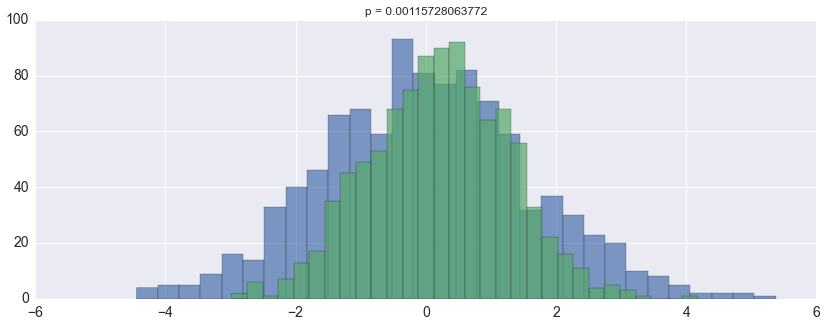

In [46]:
# Statistical Tests
a = np.random.normal(0, 1.5, size=1000)
b = np.random.normal(.2, 1, size=1000)
plt.figure()
plt.hist(a, 30, alpha=0.7)
plt.hist(b, 30, alpha=0.7)
plt.title("p = " + str(st.ttest_ind(a, b)[1]))

There's a lot more you can do with `numpy`, `scipy`, and `matplotlib`. The documentation's generally great, so look around for what you're after - it's probably already been implemented. 

## Scipy Exercises

#### ( fairly tough, some very tough )

- Run a linear regression of `data.Time` against `data.Coffees` and find out how many coffees, on average, are had over a period of one day
    - Your `time` array contains elements of type `pandas.tslib.Timestamp`. They're not that easy to use, so we're doing to use `data.Time`, which is a time in seconds ( of type `int` )
    - From `scipy.stats`, call `linregress()`. Grab the slope. Because `data.Time` is in seconds, you'll get coffees per second.
- Use your `weekdays` array to compute the average numbers of coffees had on each day of the week, and plot it
    - `weekdays` is a list, which has the method `.count()`
- We saw earlier that the sampling of the time-series was very erratic. Let's sample at one point per day, using a linear interpolation. Call it `resampled`
    - `scipy.interpolate.interp1d()`
- Take the Fourier transform of the derivative of your daily-sampled coffees time-series. Any natural frequencies emerging ?
    - This is a crude analysis, full of problems, but we should see *some* signal anyway
    - `scipy.fftpack` contains the functions you need; `rfft` and `rfftfreq` will be useful here

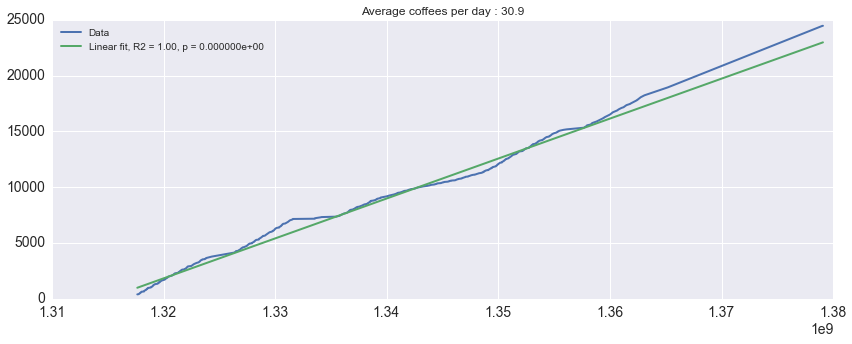

In [47]:
# Linear regression :

import scipy.stats as st

gradient, intercept, r2, pval, _ = st.linregress(data.Time, data.Coffees)

plt.plot(data.Time, data.Coffees, lw=2)
plt.plot(data.Time, data.Time * gradient + intercept, lw=2)
plt.title("Average coffees per day : %.01f" % (gradient * 24 * 60 * 60))
plt.legend(["Data", "Linear fit, R2 = %.02f, p = %e" % (r2, pval)], loc="upper left")

/Users/qcaudron/anaconda/envs/py3/lib/python3.4/site-packages/IPython/kernel/__main__.py:9: FutureWarning: irow(i) is deprecated. Please use .iloc[i] or .iat[i]


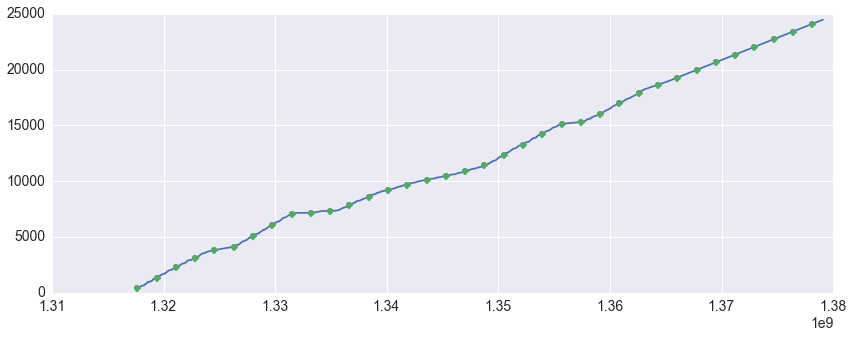

In [48]:
# Interpolation :

import scipy.interpolate as interp

# Create an interpolator
interpolator = interp.interp1d(data.Time, data.Coffees)

# The time array I want to sample at
newTime = np.arange(data.Time.irow(0), data.Time.irow(-1), 24 * 60 * 60)

# Sample at these points
resampled = interpolator(newTime)

plt.plot(data.Time, data.Coffees)
plt.plot(newTime[::20], resampled[::20], "o")

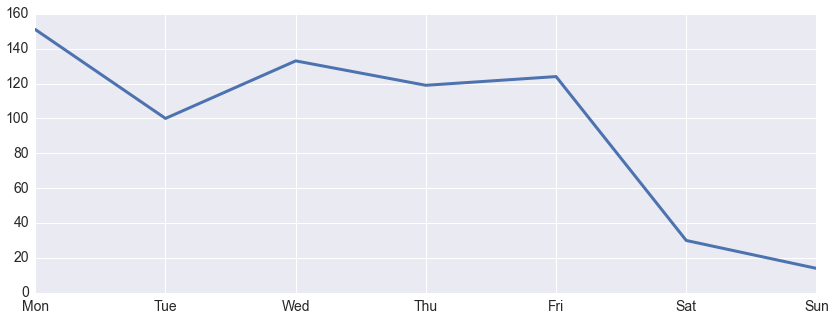

In [49]:
# Number of coffees on each day of the week

coffees_on_each_day = [weekdays.count(i) for i in range(1, 8)]

plt.plot(coffees_on_each_day, lw=3);
plt.gca().set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

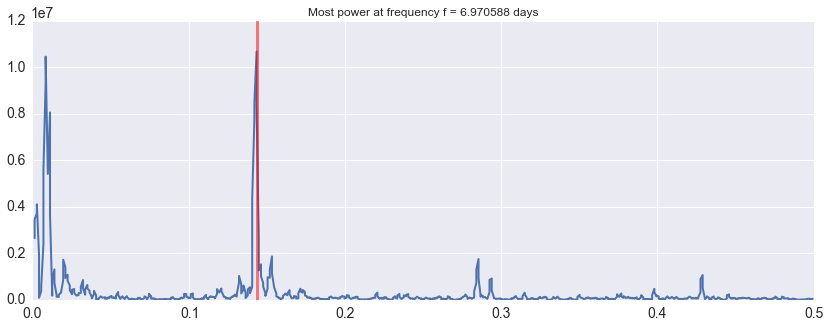

In [50]:
# FFT of derivative
from scipy import fftpack

# Derivative of the number of coffees per day
derivative = np.diff(resampled)

# Calculate the smoothed power spectrum and the relevant frequencies
# Here, we smooth using a convolution with a Hanning window
ps = np.abs(fftpack.rfft(derivative))[1:]**2 # Calculate power spectrum, remove mean component
coffeeps = np.convolve(ps, np.hanning(5), "same") # smooth
coffeefreqs = fftpack.rfftfreq(len(derivative), 1)[1:]

plt.plot(coffeefreqs, coffeeps, lw=2)
plt.axvline(coffeefreqs[np.where(coffeeps == coffeeps.max())], alpha=0.5, color="red", lw=3)
plt.title("Most power at frequency f = %f days" % (1/coffeefreqs[np.where(coffeeps == coffeeps.max())]))

# PrincetonPy

### princetonpy.com

Join our mailing list, discuss code on the forums, see upcoming sessions